In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from statistics import stdev
from functions import event_probability 

In [ ]:
# Load csv 
df_train = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')

# Create new column (Survived) in raw test data with a value of 0 on each row
df_test_raw['Survived'] = 0

In [ ]:
# Show the given row and columns in the datasets
shape_train = df_train.shape
shape_test = df_test_raw.shape
print('Train dataset shape: ')
print(shape_train)
print('Test dataset shape: ')
print(shape_test)

In [ ]:
# Show all info of the datasets
df_train.info()
df_test_raw.info()

In [300]:
display(df_train)
# display(df_test_raw)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [ ]:
# Show total of people onboard
total = df_train['PassengerId'].count() # 891

In [ ]:
# Show total number of male and female onboard of the ship
df_train['Sex'].value_counts()

In [ ]:
# Show null values per column
df_train.isnull().sum()

In [ ]:
sex = df_train.groupby('Sex')

male_pass = sex.get_group('male')
female_pass = sex.get_group('female')

In [ ]:
# Gives the age thats most common amongst men onboard
male_pass.Age.mode()


In [312]:
# Fill NaN values in the Age column
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
# df_train.loc[(df_train['Sex'] == 'male') & (df_train['Age'] == ''), 'Age'] = male_pass.Age.mean()
# df_train.loc[(df_train['Sex'] == 'female') & (df_train['Age'] == ''), 'Age'] = female_pass.Age.mean()
# df_test_raw['Age'].fillna(df_test_raw['Age'].mean(), inplace=True)


In [ ]:
# Create bins to fit an age range to every passenger
bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 120]
bin_labels = ['0-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-50', '50-54', '55-59', '60+']

# Cut age into age groups so you can view it better
df_train['Agerange'] = pd.cut(df_train.Age, bins, labels = bin_labels,include_lowest = True)
df_test_raw['Agerange'] = pd.cut(df_test_raw.Age, bins, labels = bin_labels,include_lowest = True)


In [ ]:
# Shows how many male passengers did not survive
not_surv_male_pass = male_pass[(male_pass['Survived'] == 0)]
count_not_surv_male_pass = not_surv_male_pass.PassengerId.count() # 468


In [ ]:
# Shows how many male passengers did survive
surv_male_pass = male_pass[(male_pass['Survived'] == 1)]
count_surv_male_pass = surv_male_pass.PassengerId.count() # 109

In [ ]:
# Group male passengers by survived or not to plot the results
male_pass_graph = male_pass.groupby('Survived').Survived.count()


In [ ]:
# Gives the age thats most common amongst women onboard
female_pass.Age.mean()

In [ ]:
# Shows how many female passengers did not survive
not_surv_female_pass = female_pass[(female_pass['Survived'] == 0)]
count_not_surv_female_pass = not_surv_female_pass.PassengerId.count() # 81

In [ ]:
# Shows how many female passengers did survive
surv_female_pass = female_pass[(female_pass['Survived'] == 1)]
count_surv_female_pass = surv_female_pass.PassengerId.count() # 233


In [ ]:
# Group female passengers by survived or not to plot the results
female_pass_graph = female_pass.groupby('Survived').Survived.count()

In [ ]:
# Total of people who survived
total_surv = df_train[(df_train['Survived'] == 1)]
total_not_surv = df_train[(df_train['Survived'] == 0)]

In [ ]:
# Group survivers by sex
groupby_sex_surv = total_surv.groupby('Sex').Survived.count()
groupby_sex_not_surv = total_not_surv.groupby('Sex').Survived.count()

In [ ]:
# Graphing surviving and non surviving females
fig, ax = plt.subplots(1, 2, figsize=(8,8))

ax[0].pie(male_pass_graph.values, labels=['Died', 'Survived'], autopct='%.2f%%')
ax[0].set_title('Male passengers that died')
ax[1].pie(female_pass_graph.values, labels=['Died', 'Survived'], autopct='%.2f%%')
ax[1].set_title('Female passengers that died')
ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
# Probability for surviving as a female
prob_surv_female = event_probability(count_surv_female_pass, total)
print('Probability for surviving as a female: ' + str(prob_surv_female) + '%')

# Probability for not surviving as a female
prob_not_surv_female = event_probability(count_not_surv_female_pass, total)
print('Probability for not surviving as a female: ' + str(prob_not_surv_female) + '%')


In [ ]:
# Probability for surviving as a male
prob_surv_male = event_probability(count_surv_male_pass, total)
print('Probability for surviving as a male: ' + str(prob_surv_male) + '%')

# Probability for not surviving as male
prob_not_surv_male = event_probability(count_not_surv_male_pass, total)
print('Probability for not surviving as male: ' + str(prob_not_surv_male) + '%')

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df_train.Pclass)
plt.xticks(range(1,4,1))
plt.yticks(range(100,550,50))
plt.xlabel('Travel class', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
plt.show()

In [ ]:
classes = df_train.groupby('Pclass')

first = classes.get_group(1)
second = classes.get_group(2)
third = classes.get_group(3)

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
xlabels = ['Died', 'Survived']

ax[0].hist(first.Survived)
ax[0].set_title("First class passangers",fontsize = 20)
ax[0].set_ylabel("Total numbers of passangers",fontsize = 20)
ax[0].set_xticklabels(xlabels)
ax[0].set_xticks(range(0,2,1))

ax[1].hist(second.Survived)
ax[1].set_title("Second Class Passangers",fontsize = 20)
ax[1].set_ylabel("Total Numbers Of passangers",fontsize = 20)
ax[1].set_xticklabels(xlabels)
ax[1].set_xticks(range(0,2,1))

ax[2].hist(third.Survived)
ax[2].set_title("Third Class Passangers",fontsize = 20)
ax[2].set_ylabel("Total Number Of Passangers",fontsize = 20)
ax[2].set_xticklabels(xlabels)
ax[2].set_xticks(range(0,2,1))

plt.show()

In [293]:
# Group female passengers by class. This way we can plot them into histograms to see survival rate
female_pass_class = female_pass.groupby('Pclass')

female_first = female_pass_class.get_group(1)
female_second = female_pass_class.get_group(2)
female_third = female_pass_class.get_group(3)

# Group male passengers by class. This way we can plot them into histograms to see survival rate
male_pass_class = male_pass.groupby('Pclass')

male_first = male_pass_class.get_group(1)
male_second = male_pass_class.get_group(2)
male_third = male_pass_class.get_group(3)

/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/2481739255.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xlabels)
/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/2481739255.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(xlabels)
/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/2481739255.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(xlabels)


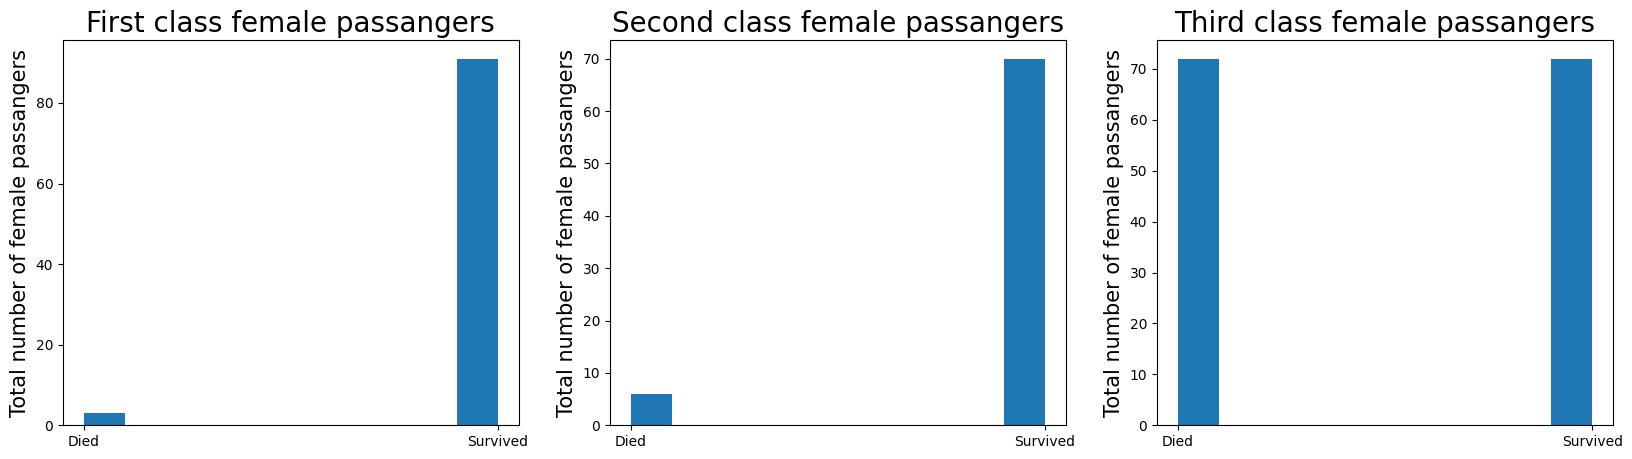

In [296]:
# Histogram of female passengers per class, this way we can conclude that most female passengers survived in the first and second class
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].hist(female_first.Survived)
ax[0].set_title("First class female passangers",fontsize = 20)
ax[0].set_ylabel("Total number of female passangers",fontsize = 15)
ax[0].set_xticklabels(xlabels)
ax[0].set_xticks(range(0,2,1))

ax[1].hist(female_second.Survived)
ax[1].set_title("Second class female passangers",fontsize = 20)
ax[1].set_ylabel("Total number of female passangers",fontsize = 15)
ax[1].set_xticklabels(xlabels)
ax[1].set_xticks(range(0,2,1))

ax[2].hist(female_third.Survived)
ax[2].set_title("Third class female passangers",fontsize = 20)
ax[2].set_ylabel("Total number of female passangers",fontsize = 15)
ax[2].set_xticklabels(xlabels)
ax[2].set_xticks(range(0,2,1))

plt.show()

/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/2515412113.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xlabels)
/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/2515412113.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(xlabels)
/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_87433/2515412113.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(xlabels)


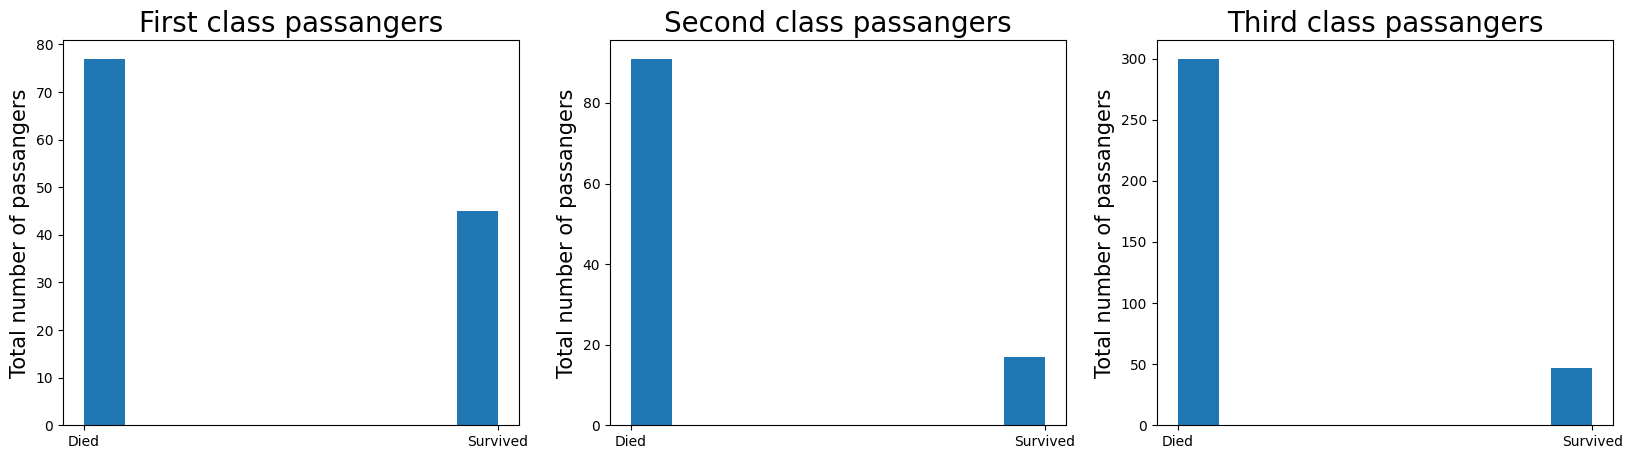

In [295]:
# Histogram of male passengers per class, most male passengers died in every class
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].hist(male_first.Survived)
ax[0].set_title("First class passangers",fontsize = 20)
ax[0].set_ylabel("Total number of passangers",fontsize = 15)
ax[0].set_xticklabels(xlabels)
ax[0].set_xticks(range(0,2,1))

ax[1].hist(male_second.Survived)
ax[1].set_title("Second class passangers",fontsize = 20)
ax[1].set_ylabel("Total number of passangers",fontsize = 15)
ax[1].set_xticklabels(xlabels)
ax[1].set_xticks(range(0,2,1))

ax[2].hist(male_third.Survived)
ax[2].set_title("Third class passangers",fontsize = 20)
ax[2].set_ylabel("Total number of passangers",fontsize = 15)
ax[2].set_xticklabels(xlabels)
ax[2].set_xticks(range(0,2,1))

plt.show()

In [299]:
#Create title feature from name
df_train['Title'] = df_train.Name.str.split(', ').str[1]
df_train['Title'] = df_train.Title.str.split('. ').str[0]

df_test_raw['Title'] = df_test_raw.Name.str.split(', ').str[1]
df_test_raw['Title'] = df_test_raw.Title.str.split('. ').str[0]


In [314]:
# Create bins to fit an fare range to every passenger
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
bin_labels_fare = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-149', '150+']

# Cut age into age groups so you can view it better
df_train['Farerange'] = pd.cut(df_train.Fare, bins, labels = bin_labels_fare,include_lowest = True)
df_test_raw['Farerange'] = pd.cut(df_test_raw.Fare, bins, labels = bin_labels_fare,include_lowest = True)

In [ ]:
df_test_raw.loc[(df_test_raw['Sex'] == 'female') & (df_test_raw['Pclass'] == 1), 'Survived'] = 1
df_test_raw.loc[(df_test_raw['Sex'] == 'female') & (df_test_raw['Pclass'] == 2), 'Survived'] = 1

In [ ]:
# Create new dataframe that only contains de PassengerId and Survived columns
data = df_test_raw[['PassengerId', 'Survived']]

# Display the new dataframe
display(data)

# Create a csv file of the dataframe called result
# data.to_csv('result.csv', index=False)